<em>Import the required packages with their customary aliases as follows:

* import pandas as pd
* import numpy as np
* import matplotlib.pyplot as plt
* import seaborn as sns

Use the %matplotlib inline command so that your plots show in the notebook without having to call plt.show() every time.</em>

In [681]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<br></br>
<em>Using the pandas read_csv() function, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first 6 rows.</em>

In [682]:
gdp_df = pd.read_csv("data/gdp_percapita.csv")
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2017,1758.465636,NaN
1,Afghanistan,2016,1757.023490,NaN
2,Afghanistan,2015,1766.593077,NaN
3,Afghanistan,2014,1795.735834,NaN
4,Afghanistan,2013,1807.762344,NaN
5,Afghanistan,2012,1772.764974,NaN


<br></br>
<em>Repeat for the internet use dataset. Call this DataFrame internet_df. Take a look at the first six rows.</em>

In [683]:
internet_df = pd.read_csv("data/internet_use.csv", nrows=4497)
internet_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


<br></br>
<em>Look at the shape of each dataframe - how many rows, how many columns.</em>

In [684]:
gdp_df.shape

(6502, 4)

In [685]:
internet_df.shape

(4497, 4)

<br></br>
<em>Take a look at the data types for the columns in each table.</em>

In [686]:
gdp_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

In [687]:
internet_df.dtypes

Country or Area     object
Year                object
Value              float64
Value Footnotes    float64
dtype: object

<br></br>
<em>Take a look at the last 10 rows of each dataset in turn.</em>

In [688]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6492,Zimbabwe,1997,3036.422224,NaN
6493,Zimbabwe,1996,2985.856605,NaN
6494,Zimbabwe,1995,2736.486436,NaN
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN
6500,footnoteSeqID,Footnote,NaN,NaN
6501,2,"Excludes South Sudan after July 9, 2011.",NaN,NaN


In [689]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN
4495,footnoteSeqID,Footnote,NaN,NaN
4496,1,Population age 5+. Census.,NaN,NaN


<br></br>
<em>Drop the footnotes rows from dataset gdp_df</em>

In [690]:
gdp_df = gdp_df.iloc[0:6500,:]
gdp_df.tail()


,Country or Area,Year,Value,Value Footnotes
6495,Zimbabwe,1994,2768.309953,NaN
6496,Zimbabwe,1993,2572.870395,NaN
6497,Zimbabwe,1992,2591.007534,NaN
6498,Zimbabwe,1991,2906.272849,NaN
6499,Zimbabwe,1990,2819.549467,NaN


<br></br>
<em>Drop the footnotes rows from dataset internet_df</em>

In [691]:
internet_df = internet_df.iloc[0:4495,:]
internet_df.tail()

,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


<br></br>
<em>Drop the 'value footnotes' data (column) from both datasets. Check that this worked as expected.</em>

In [692]:
gdp_df = gdp_df.drop(['Value Footnotes'], axis=1)



In [693]:
print(gdp_df.columns)

Index(['Country or Area', 'Year', 'Value'], dtype='object')


In [694]:
internet_df = internet_df.drop(['Value Footnotes'], axis=1)


In [695]:
print(internet_df.columns)

Index(['Country or Area', 'Year', 'Value'], dtype='object')


<br></br>
<em>Change the columns for the GDP Per Capita data frame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.</em>

In [696]:
gdp_df = gdp_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2017,1758.465636
1,Afghanistan,2016,1757.023490
2,Afghanistan,2015,1766.593077
3,Afghanistan,2014,1795.735834
4,Afghanistan,2013,1807.762344


<br></br>
<em>Change the columns for the Internet Users data frame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.</em>

In [697]:
internet_df = internet_df.rename(columns={'Country or Area': 'Country', 'Year': 'Year', 'Value': 'Internet_Users_Pct'})
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


<br></br>
<em>Merge the two DataFrames to one. Merge all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first five rows of your new data frame to confirm it merged correctly.</em>

In [698]:
gdp_and_internet_use = pd.merge(gdp_df,internet_df, on=['Country','Year'], how ='inner')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
1,Afghanistan,2013,1807.762344,5.900000
2,Afghanistan,2012,1772.764974,5.454545
3,Afghanistan,2011,1626.764793,5.000000
4,Afghanistan,2010,1671.581238,4.000000


<br></br>
<em>Look at the last five rows to make sure the data is clean and as expected.</em>

In [699]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,0.033080
3515,Zimbabwe,1996,2985.856605,0.016790
3516,Zimbabwe,1995,2736.486436,0.007684
3517,Zimbabwe,1994,2768.309953,0.001739
3518,Zimbabwe,1990,2819.549467,0.000000


<br></br>
<em>Subset the combined data frame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.</em>

In [700]:
gdp_and_internet_use_04_09_14 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])]
gdp_and_internet_use_04_09_14.head(9)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.390000
5,Afghanistan,2009,1502.354073,3.550000
10,Afghanistan,2004,1025.208245,0.105809
13,Albania,2014,10700.522802,60.100000
18,Albania,2009,9525.372374,41.200000
23,Albania,2004,7001.054941,2.420388
34,Algeria,2014,13549.025150,18.090000
39,Algeria,2009,12694.745562,11.230000
44,Algeria,2004,11847.319747,4.634475


<br></br>
<em>Create three new data frames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.</em>

In [701]:
gdp_and_internet_use_04 = gdp_and_internet_use_04_09_14[gdp_and_internet_use_04_09_14['Year'] =='2004']
gdp_and_internet_use_04.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2004,1025.208245,0.105809
23,Albania,2004,7001.054941,2.420388
44,Algeria,2004,11847.319747,4.634475
66,Angola,2004,4604.657044,0.464815
86,Antigua and Barbuda,2004,21183.426857,24.266544


In [702]:
gdp_and_internet_use_09 = gdp_and_internet_use_04_09_14[gdp_and_internet_use_04_09_14['Year'] =='2009']
gdp_and_internet_use_09.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2009,1502.354073,3.55
18,Albania,2009,9525.372374,41.20
39,Algeria,2009,12694.745562,11.23
61,Angola,2009,6292.534856,6.00
81,Antigua and Barbuda,2009,22592.413330,42.00


In [703]:
gdp_and_internet_use_14 = gdp_and_internet_use_04_09_14[gdp_and_internet_use_04_09_14['Year'] =='2014']
gdp_and_internet_use_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,6.39
13,Albania,2014,10700.522802,60.10
34,Algeria,2014,13549.025150,18.09
56,Angola,2014,6813.052106,21.26
76,Antigua and Barbuda,2014,20820.551057,64.00


<br></br>
<em>Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab for auto-complete options).</em>

In [704]:
highest_internet_users_14 = gdp_and_internet_use_14.sort_values(by='Internet_Users_Pct', ascending=False)
highest_internet_users_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17


<br></br>
<em>Which country had the lowest percentage of internet users in 2014? What was the percentage?</em>

In [705]:
lowest_internet_users_14 = gdp_and_internet_use_14.sort_values(by='Internet_Users_Pct', ascending=True)
lowest_internet_users_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3104,Timor-Leste,2014,6466.737708,1.14
539,Burundi,2014,768.469837,1.38
1275,Guinea,2014,1836.561073,1.72
2270,Niger,2014,900.136918,1.95
2742,Sierra Leone,2014,1707.097335,2.10


<br></br>
<em>Which country had the highest percentage of internet users in 2004? What was the percentage?</em>

In [706]:
highest_internet_users_04 = gdp_and_internet_use_04.sort_values(by='Internet_Users_Pct', ascending=False)
highest_internet_users_04.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3002,Sweden,2004,40299.920252,83.89
1405,Iceland,2004,38893.378800,83.88
864,Denmark,2004,43670.445300,80.93
2320,Norway,2004,61675.600782,77.69
1077,Finland,2004,38188.251092,72.39


<br></br>
<em>Which country had the lowest percentage of internet users in 2004? What was the percentage?</em>

In [707]:
lowest_internet_users_04 = gdp_and_internet_use_04.sort_values(by='Internet_Users_Pct', ascending=True)
lowest_internet_users_04.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2146,Myanmar,2004,1999.710075,0.024337
1773,Liberia,2004,916.487110,0.031011
3052,Tajikistan,2004,1644.455641,0.077480
10,Afghanistan,2004,1025.208245,0.105809
1033,Ethiopia,2004,676.917430,0.155335


<br></br>
<em>Which country had the highest percentage of internet users in 2009? What was the percentage?</em>

In [708]:
highest_internet_users_09 = gdp_and_internet_use_09.sort_values(by='Internet_Users_Pct', ascending=False)
highest_internet_users_09.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1400,Iceland,2009,41505.084835,93.00
2315,Norway,2009,62698.285355,92.08
2997,Sweden,2009,40905.799578,91.00
2204,Netherlands,2009,45724.862767,89.63
1817,Luxembourg,2009,89098.734244,87.31


<br></br>
<em>Which country had the lowest percentage of internet users in 2009? What was the percentage?</em>

In [709]:
lowest_internet_users_09 = gdp_and_internet_use_09.sort_values(by='Internet_Users_Pct', ascending=True)
lowest_internet_users_09.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3109,Timor-Leste,2009,9275.529304,0.185252
2141,Myanmar,2009,3387.818242,0.220000
2747,Sierra Leone,2009,1172.862734,0.260000
569,Cambodia,2009,2417.293669,0.530000
988,Eritrea,2009,1950.533339,0.540000


<br></br>
<em>Which country had the highest gdp per capita in 2014? What was the gdp per capita?</em>

In [710]:
highest_GDP_2014 = gdp_and_internet_use_14.sort_values(by='GDP_Per_Capita', ascending=False)
highest_GDP_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49
1812,Luxembourg,2014,92349.186486,94.67
2765,Singapore,2014,81965.361071,82.00
1685,Kuwait,2014,72588.486007,78.70
2310,Norway,2014,63419.314779,96.30


<br></br>
<em>Which country had the lowest gdp per capita in 2014? What was the gdp per capita?</em>

In [711]:
lowest_GDP_2014 = gdp_and_internet_use_14.sort_values(by='GDP_Per_Capita', ascending=True)
lowest_GDP_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.70
539,Burundi,2014,768.469837,1.38
2270,Niger,2014,900.136918,1.95
2116,Mozambique,2014,1117.872529,5.94
1856,Malawi,2014,1142.530804,5.83


<br></br>
<em>Create a scatterplot: 2004 Percent Using the Internet vs GDP Per Capita.</em>

([<matplotlib.axis.YTick at 0x1a4585f438>,
 <a list of 7 Text yticklabel objects>)

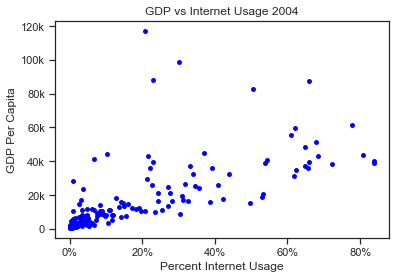

In [712]:
plt.scatter(gdp_and_internet_use_04['Internet_Users_Pct'], gdp_and_internet_use_04['GDP_Per_Capita'], color = "blue", s= 15)
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Internet Usage')
plt.title('GDP vs Internet Usage 2004')
plt.xticks([0,20,40,60,80],["0%","20%","40%","60%","80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000],["0","20k","40k","60k","80k","100k", "120k"])

<br></br>
<em>Create a scatterplot: 2009 Percent Using the Internet vs GDP Per Capita.</em>

([<matplotlib.axis.YTick at 0x1a3cd3ae48>,
 <a list of 7 Text yticklabel objects>)

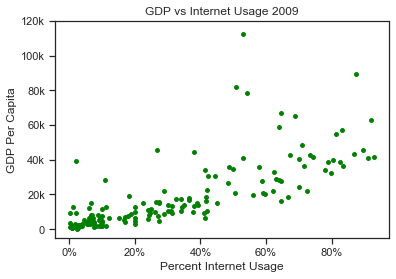

In [713]:
plt.scatter(gdp_and_internet_use_09['Internet_Users_Pct'], gdp_and_internet_use_09['GDP_Per_Capita'], color = "green", s= 15)
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Internet Usage')
plt.title('GDP vs Internet Usage 2009')
plt.xticks([0,20,40,60,80],["0%","20%","40%","60%","80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000],["0","20k","40k","60k","80k","100k", "120k"])

<br></br>
<em>Create a scatterplot: 2014 Percent Using the Internet vs GDP Per Capita</em>

([<matplotlib.axis.YTick at 0x1a452157f0>,
 <a list of 7 Text yticklabel objects>)

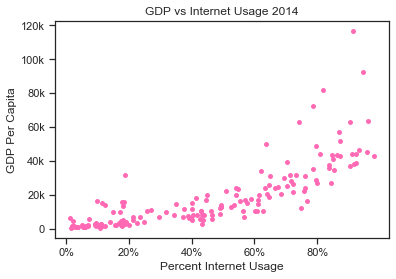

In [714]:
plt.scatter(gdp_and_internet_use_14['Internet_Users_Pct'], gdp_and_internet_use_14['GDP_Per_Capita'], color = "hotpink", s= 15)
plt.ylabel('GDP Per Capita')
plt.xlabel('Percent Internet Usage')
plt.title('GDP vs Internet Usage 2014')
plt.xticks([0,20,40,60,80],["0%","20%","40%","60%","80%"])
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000],["0","20k","40k","60k","80k","100k", "120k"])

<br></br>
<em>Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.</em>

--> As time moves from 2004 to 2014, there are fewer outliers in the data. The positive correlation between a country's GDP per capita and percent of internet users becomes more defined.




<br></br>
<em>Look at the distribution of gdp per capita values for 2014. Is it unimodal?</em>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a453e32e8>]],
      dtype=object)

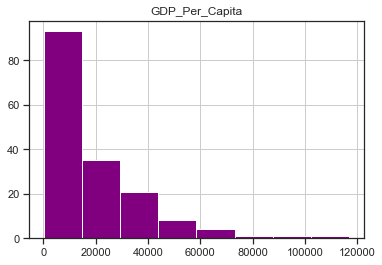

In [715]:
gdp_and_internet_use_14.hist(column='GDP_Per_Capita',bins=8, color='Purple')

Yes, the distribution of GDP per capita in 2014 is unimodal.

<br></br>
<em>Look at the distribution of Internet Use for 2014. Is it unimodal?</em>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a45b82400>]],
      dtype=object)

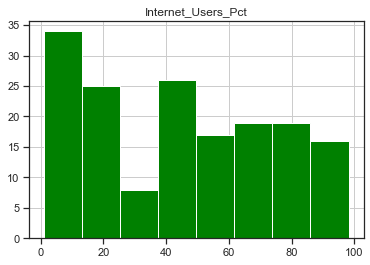

In [716]:
gdp_and_internet_use_14.hist(column='Internet_Users_Pct',bins=8, color='Green')

No, the distribution of GDP per capita in 2014 is not unimodal; it is bimodal.

<br></br>
<em>What are the top 5 countries in terms of internet use in 2014?</em>

In [717]:
highest_internet_users_14.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1395,Iceland,2014,42774.888851,98.16
2310,Norway,2014,63419.314779,96.30
854,Denmark,2014,45057.074170,95.99
1812,Luxembourg,2014,92349.186486,94.67
2199,Netherlands,2014,46238.209702,93.17


<br></br>
<em>Create a data frame called top_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.</em>

In [718]:
top_5_internet = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])& 
                                                    gdp_and_internet_use['Country'].isin(['Iceland', 'Norway', 'Denmark', 'Luxembourg', 'Netherlands'])]



In [719]:
top_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
854,Denmark,2014,45057.074170,95.99
859,Denmark,2009,43382.625459,86.84
864,Denmark,2004,43670.445300,80.93
1395,Iceland,2014,42774.888851,98.16
1400,Iceland,2009,41505.084835,93.00
1405,Iceland,2004,38893.378800,83.88
1812,Luxembourg,2014,92349.186486,94.67
1817,Luxembourg,2009,89098.734244,87.31
1822,Luxembourg,2004,87209.819398,65.88
2199,Netherlands,2014,46238.209702,93.17


<br></br>
<em>Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the highest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?</em>

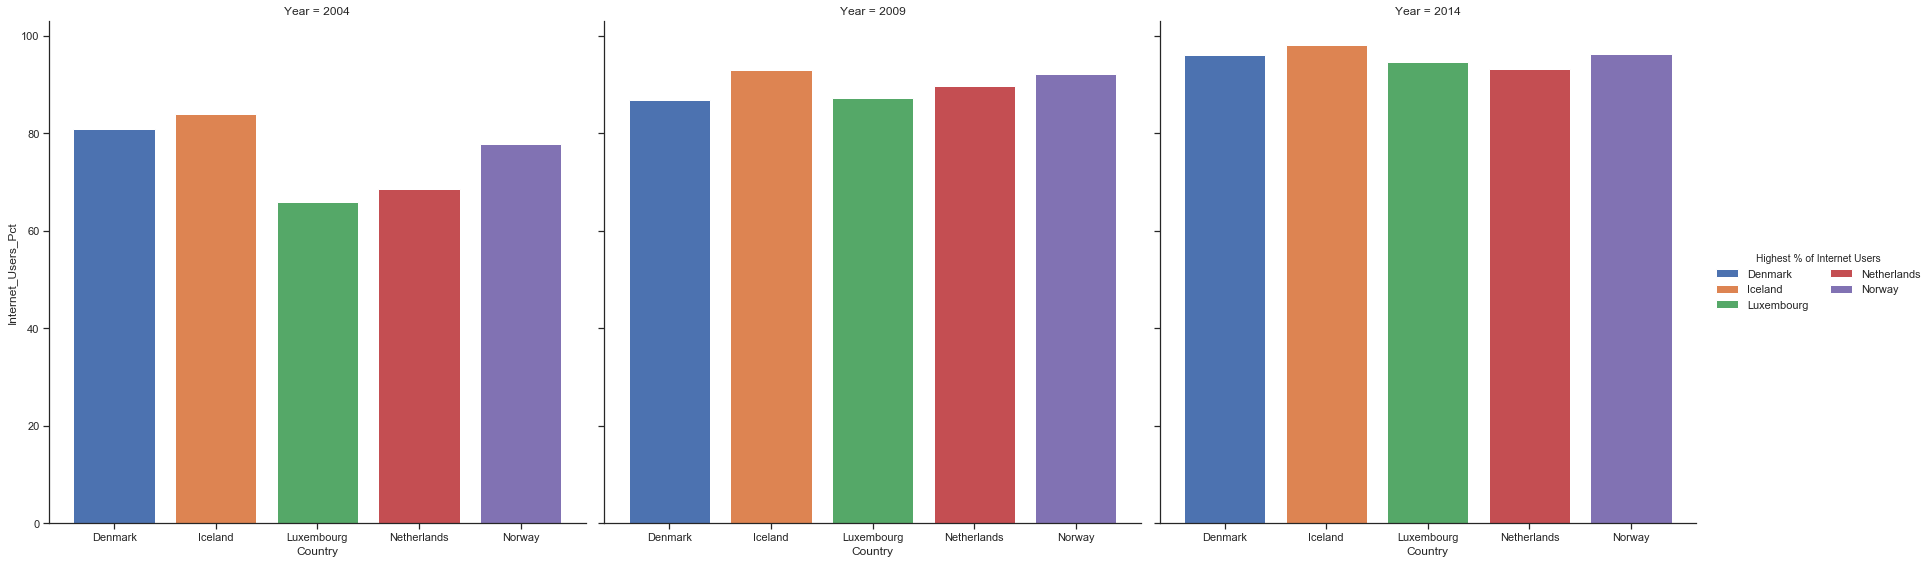

In [720]:
sns.set(style='ticks')
grid = sns.FacetGrid(top_5_internet, col='Year', hue='Country', col_wrap=3, height=8)
grid.map(plt.bar, 'Country','Internet_Users_Pct')
grid.add_legend(ncol=2, title= 'Highest % of Internet Users')

Luxembourg had the greatest growth in terms of percent of internet users between 2004 and 2014.

<br></br>
<em>Repeat the steps above to look at the trend for the 5 countries with the lowest 2014 internet usage. Which country has consistently had the least internet use?</em>

<em>What are the bottom 5 countries in terms of internet use in 2014?</em>

In [721]:
lowest_internet_users_14.sort_values(by='Internet_Users_Pct', ascending=True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3104,Timor-Leste,2014,6466.737708,1.14
539,Burundi,2014,768.469837,1.38
1275,Guinea,2014,1836.561073,1.72
2270,Niger,2014,900.136918,1.95
2742,Sierra Leone,2014,1707.097335,2.10


<em>Create a data frame called bottom_5_internet from the combined data frame that has all three years for these 5 countries. You should have 15 rows. Check that this is true.</em>

In [722]:
bottom_5_internet = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])& 
                                                    gdp_and_internet_use['Country'].isin(['Timor-Leste', 'Burundi', 'Guinea', 'Niger', 'Sierra Leone'])]

In [723]:
bottom_5_internet

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
539,Burundi,2014,768.469837,1.380000
544,Burundi,2009,721.063140,0.900000
549,Burundi,2004,708.833720,0.349060
1275,Guinea,2014,1836.561073,1.720000
1280,Guinea,2009,1626.174435,0.940000
1285,Guinea,2004,1583.618832,0.508819
2270,Niger,2014,900.136918,1.950000
2275,Niger,2009,778.982257,0.760000
2280,Niger,2004,757.751262,0.189934
2742,Sierra Leone,2014,1707.097335,2.100000


<em>Create a seaborn FacetGrid to show the internet usage trend over time for these 5 countries (those with the lowest reported internet use in 2014). Which country had the greatest growth between 2004 and 2014?</em>

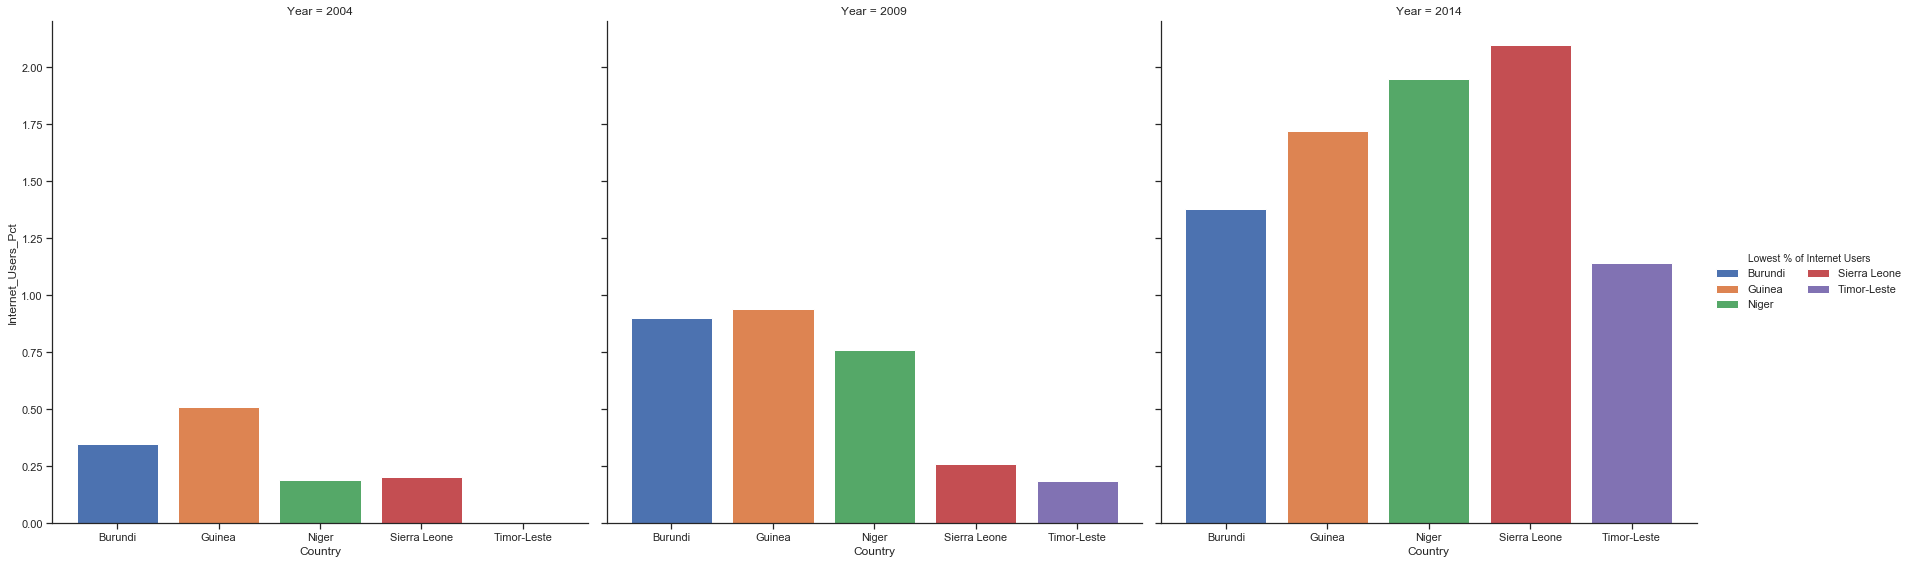

In [724]:
sns.set(style='ticks')
grid = sns.FacetGrid(bottom_5_internet, col='Year', hue='Country', col_wrap=3
                     , height=8)
grid.map(plt.bar, 'Country','Internet_Users_Pct')
grid.add_legend(ncol=2, title= 'Lowest % of Internet Users')

Sierra Leone had the greatest growth in terms of percent of internet users from 2004 to 2014.

<br></br>
<em>Find the top 5 countries for 2014 in terms of GDP per capita; create a dataframe to look at 10-year trends in gdp per capita for those 5 countries. Use a seaborn facet grid for this.</em>

In [725]:
highest_GDP_2014.sort_values(by='GDP_Per_Capita', ascending=False).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2556,Qatar,2014,116693.507701,91.49
1812,Luxembourg,2014,92349.186486,94.67
2765,Singapore,2014,81965.361071,82.00
1685,Kuwait,2014,72588.486007,78.70
2310,Norway,2014,63419.314779,96.30


In [726]:
top_5_gdp = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])& 
                                                    gdp_and_internet_use['Country'].isin(['Qatar', 'Luxembourg', 'Singapore', 'Kuwait', 'Norway'])]

In [727]:
top_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1685,Kuwait,2014,72588.486007,78.700000
1690,Kuwait,2009,81861.379333,50.800000
1695,Kuwait,2004,87851.463113,22.927112
1812,Luxembourg,2014,92349.186486,94.670000
1817,Luxembourg,2009,89098.734244,87.310000
1822,Luxembourg,2004,87209.819398,65.880000
2310,Norway,2014,63419.314779,96.300000
2315,Norway,2009,62698.285355,92.080000
2320,Norway,2004,61675.600782,77.690000
2556,Qatar,2014,116693.507701,91.490000


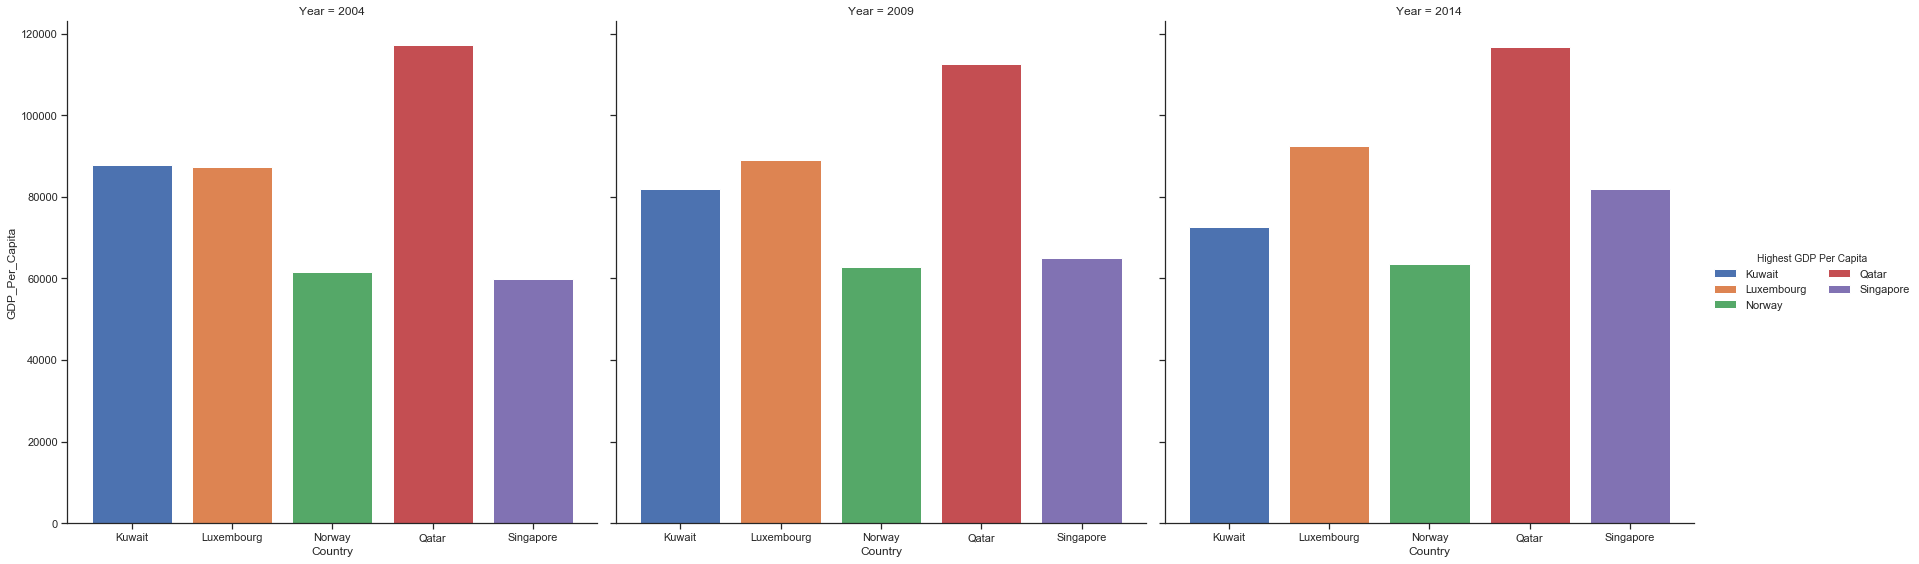

In [728]:
sns.set(style='ticks')
grid = sns.FacetGrid(top_5_gdp, col='Year', hue='Country', col_wrap=3, height=8)
grid.map(plt.bar, 'Country','GDP_Per_Capita')
grid.add_legend(ncol=2, title= 'Highest GDP Per Capita')

From 2004 to 2014, Kuwait's GDP per capita dropped and Singapore's rose.

<br></br>
<em>Repeat this one more time to look at 10-year trend for the bottom 5 countries for 2014 in terms of GDP per capita.</em>

In [729]:
lowest_GDP_2014.sort_values(by='GDP_Per_Capita', ascending=True).head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1983,Mauritania,2014,377.908916,10.70
539,Burundi,2014,768.469837,1.38
2270,Niger,2014,900.136918,1.95
2116,Mozambique,2014,1117.872529,5.94
1856,Malawi,2014,1142.530804,5.83


In [730]:
bottom_5_gdp = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2004', '2009', '2014'])& 
                                                    gdp_and_internet_use['Country'].isin(['Mauritania', 'Burundi', 'Niger', 'Mozambique', 'Malawi'])]

In [731]:
bottom_5_gdp

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
539,Burundi,2014,768.469837,1.380000
544,Burundi,2009,721.063140,0.900000
549,Burundi,2004,708.833720,0.349060
1856,Malawi,2014,1142.530804,5.830000
1861,Malawi,2009,1037.598513,1.070000
1866,Malawi,2004,862.392437,0.347505
1983,Mauritania,2014,377.908916,10.700000
1988,Mauritania,2009,336.748688,2.280000
1993,Mauritania,2004,291.842348,0.481470
2116,Mozambique,2014,1117.872529,5.940000


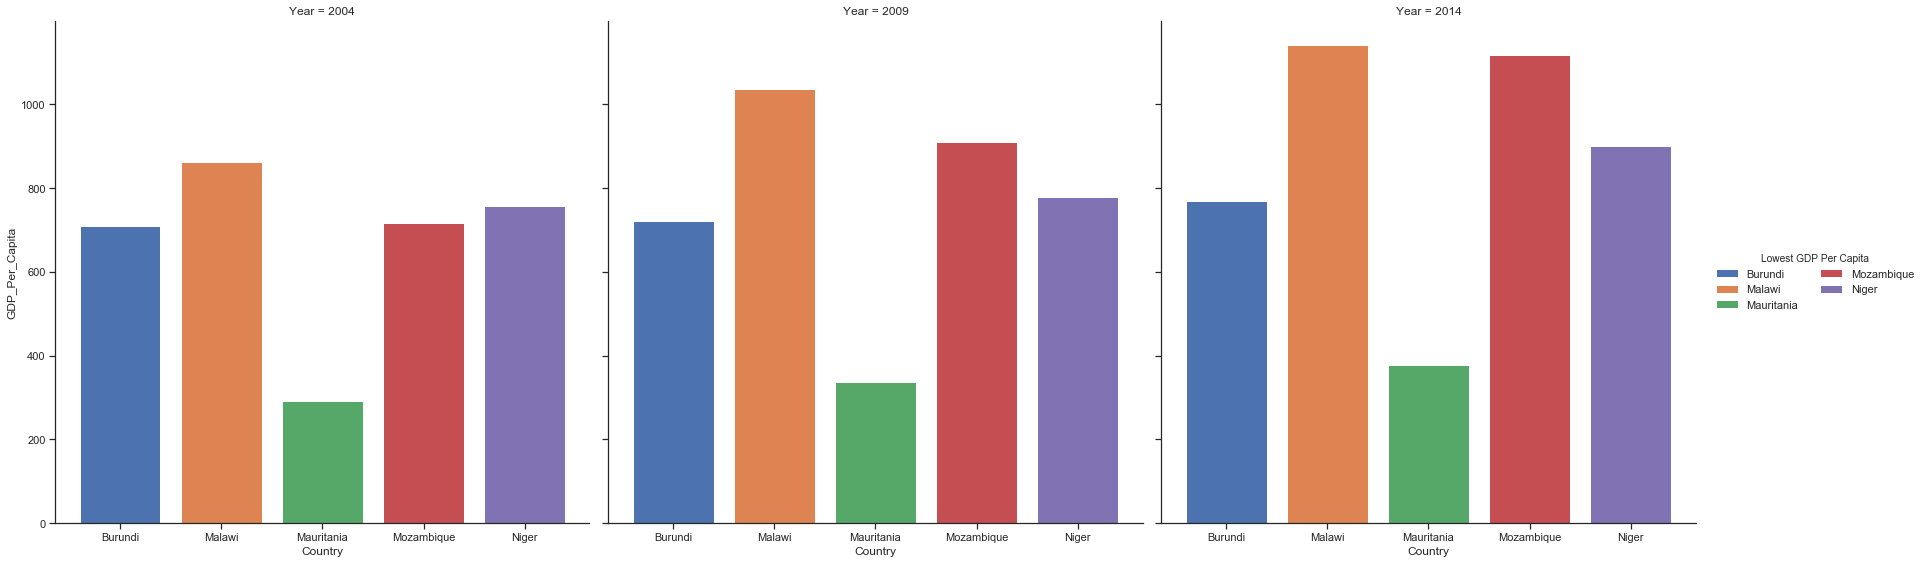

In [732]:
sns.set(style='ticks')
grid = sns.FacetGrid(bottom_5_gdp, col='Year', hue='Country', col_wrap=3, height=8)
grid.map(plt.bar, 'Country','GDP_Per_Capita')
grid.add_legend(ncol=2, title= 'Lowest GDP Per Capita')

Mozambique experienced the most GDP per capita growth between 2004 and 2014.

<br></br>

<em>Is there anything surprising or unusual in any of these plots? Searching on the internet, can you find any possible explanations for unusual findings?</em>

It is interesting that Singapore's GDP rose approximately 20000 between 2004 and 2014. According to a 2010 New York Times article, the small Asian country's dependence on overseas demand left it vulnerable to the impact of the 2008-9 financial crisis. The down times were not to last. Singapore bounced back strong from the recession thanks to it's strength as a pharmaceutical and electronic manufacturing hub   

https://www.nytimes.com/2010/07/15/business/global/15asiaecon.html

<br></br>
<em>Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.</em>

Syrian refugee UNHCR data

In [733]:
syrian_df = pd.read_csv('data/Syrian_Refugee_UNHCR_data.csv', skipfooter = 3, engine='python')
syrian_df.head()

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees<sup>*</sup>,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations<sup>**</sup>,Total refugees and people in refugee-like situations assisted by UNHCR
0,Albania,Syrian Arab Rep.,2016,3,3.0,3,3.0
1,Anguilla,Syrian Arab Rep.,2016,1,1.0,1,1.0
2,Antigua and Barbuda,Syrian Arab Rep.,2016,4,4.0,4,4.0
3,Argentina,Syrian Arab Rep.,2016,357,6.0,357,6.0
4,Armenia,Syrian Arab Rep.,2016,626,626.0,14626,4664.0


In [734]:
syrian_df.tail()

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees<sup>*</sup>,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations<sup>**</sup>,Total refugees and people in refugee-like situations assisted by UNHCR
1326,Italy,Syrian Arab Rep.,1981,4,NaN,4,NaN
1327,Lebanon,Syrian Arab Rep.,1981,500,NaN,500,NaN
1328,Italy,Syrian Arab Rep.,1980,2,NaN,2,NaN
1329,Lebanon,Syrian Arab Rep.,1980,500,NaN,500,NaN
1330,Lebanon,Syrian Arab Rep.,1979,500,NaN,500,NaN


In [735]:
syrian_df.columns

Index(['Country or territory of asylum or residence',
       'Country or territory of origin', 'Year', 'Refugees<sup>*</sup>',
       'Refugees assisted by UNHCR',
       'Total refugees and people in refugee-like situations<sup>**</sup>',
       'Total refugees and people in refugee-like situations assisted by UNHCR'],
      dtype='object')

In [736]:
syrian_df = syrian_df.rename(columns={'Country or territory of asylum or residence': 'Country','Refugees<sup>*</sup>': 'Official_Refugees', 'Total refugees and people in refugee-like situations<sup>**</sup>': 'Official_and_Unofficial_Refugees', 'Total refugees and people in refugee-like situations assisted by UNHCR': 'Official_and_Unofficial_Refugees_assisted_by_UNHCR'})
syrian_df.head()

,Country,Country or territory of origin,Year,Official_Refugees,Refugees assisted by UNHCR,Official_and_Unofficial_Refugees,Official_and_Unofficial_Refugees_assisted_by_UNHCR
0,Albania,Syrian Arab Rep.,2016,3,3.0,3,3.0
1,Anguilla,Syrian Arab Rep.,2016,1,1.0,1,1.0
2,Antigua and Barbuda,Syrian Arab Rep.,2016,4,4.0,4,4.0
3,Argentina,Syrian Arab Rep.,2016,357,6.0,357,6.0
4,Armenia,Syrian Arab Rep.,2016,626,626.0,14626,4664.0


In [737]:
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [738]:
syrian_df.dtypes

Country                                                object
Country or territory of origin                         object
Year                                                    int64
Official_Refugees                                       int64
Refugees assisted by UNHCR                            float64
Official_and_Unofficial_Refugees                        int64
Official_and_Unofficial_Refugees_assisted_by_UNHCR    float64
dtype: object

In [739]:
#syrian_df.Year = syrian_df.Year.astype(str)
gdp_df.Year = gdp_df.Year.astype(int)

In [740]:
syrian_gdp_df = pd.merge(gdp_df, syrian_df, on=['Country','Year'], how='inner')

In [741]:
syrian_gdp_df = syrian_gdp_df[['Country', 'Year', 'GDP_Per_Capita', 'Official_Refugees']]
syrian_gdp_df.head()

,Country,Year,GDP_Per_Capita,Official_Refugees
0,Afghanistan,2012,1772.764974,1
1,Albania,2016,11356.719009,3
2,Albania,2015,10971.046329,3
3,Albania,2014,10700.522802,3
4,Albania,1998,4450.923069,3


In [742]:
print(syrian_gdp_df.Official_Refugees.isnull().sum(),'null values')
print(syrian_gdp_df.shape[0],'total rows')

0 null values
1169 total rows


In [743]:
syrian_gdp_df.loc[syrian_gdp_df.Country == 'Turkey']

,Country,Year,GDP_Per_Capita,Official_Refugees
1029,Turkey,2016,23664.431226,2823987
1030,Turkey,2015,23311.659692,2503549
1031,Turkey,2014,22343.497453,1557899
1032,Turkey,2013,21610.485244,585601
1033,Turkey,2012,20259.438132,248466
1034,Turkey,2011,19651.678477,19
1035,Turkey,2010,17959.240722,9
1036,Turkey,2009,16787.626890,8
1037,Turkey,2008,17842.232821,12
1038,Turkey,2007,17905.448397,5


In [768]:
top_acceptors = syrian_gdp_df.sort_values(by=['Official_Refugees', 'GDP_Per_Capita'], ascending=False)
top_acceptors.head(15)

,Country,Year,GDP_Per_Capita,Official_Refugees
1029,Turkey,2016,23664.431226,2823987
1030,Turkey,2015,23311.659692,2503549
1031,Turkey,2014,22343.497453,1557899
604,Lebanon,2014,12349.035986,1147494
603,Lebanon,2015,11887.267267,1062690
602,Lebanon,2016,11756.973321,1005503
605,Lebanon,2013,12833.361497,851284
558,Jordan,2016,8320.346083,648836
559,Jordan,2015,8407.679672,628223
560,Jordan,2014,8530.282724,623112


<br></br>
<em>Subset the combined data frame to keep only the data for the years since 2011.</em>


In [745]:
civil_war_syrian_gdp_df = syrian_gdp_df[syrian_gdp_df['Year'].isin(['2011','2012','2013','2014','2015','2016'])]

In [772]:
civil_war_syrian_gdp_df.sort_values(by=['Official_Refugees', 'Year'], ascending=False).head(30)
                                                                            

,Country,Year,GDP_Per_Capita,Official_Refugees
1029,Turkey,2016,23664.431226,2823987
1030,Turkey,2015,23311.659692,2503549
1031,Turkey,2014,22343.497453,1557899
604,Lebanon,2014,12349.035986,1147494
603,Lebanon,2015,11887.267267,1062690
602,Lebanon,2016,11756.973321,1005503
605,Lebanon,2013,12833.361497,851284
558,Jordan,2016,8320.346083,648836
559,Jordan,2015,8407.679672,628223
560,Jordan,2014,8530.282724,623112


<br></br>
<em>Create a new data frame for each year since 2011.</em>

In [753]:
civil_war_syrian_gdp_df_11 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2011'])]
civil_war_syrian_gdp_df_11.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
389,Germany,2011,42692.519757,10155
949,Sweden,2011,43808.501157,1206
266,Denmark,2011,44403.394146,1197
976,Switzerland,2011,56183.832585,1074
701,Netherlands,2011,46599.021030,1064
56,Austria,2011,44452.732746,903
1098,United Kingdom,2011,36820.321718,693
192,Canada,2011,41569.449617,547
1122,United States,2011,49883.113984,373
360,France,2011,37440.638630,351


In [757]:
civil_war_syrian_gdp_df_12 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2012'])]
civil_war_syrian_gdp_df_12.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
1033,Turkey,2012,20259.438132,248466
562,Jordan,2012,8871.100527,238798
606,Lebanon,2012,13354.764142,126755
480,Iraq,2012,15032.584203,63586
388,Germany,2012,42822.099404,18165
312,Egypt,2012,9981.551961,12836
948,Sweden,2012,43355.807762,6051
265,Denmark,2012,44336.812461,1903
1097,United Kingdom,2012,37094.312626,1717
55,Austria,2012,44551.617574,1675


In [760]:
civil_war_syrian_gdp_df_13 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2013'])]
civil_war_syrian_gdp_df_13.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
605,Lebanon,2013,12833.361497,851284
1032,Turkey,2013,21610.485244,585601
561,Jordan,2013,8662.165071,585304
479,Iraq,2013,15556.958793,212809
311,Egypt,2013,9970.975766,131659
387,Germany,2013,42914.476113,21253
947,Sweden,2013,43522.351215,17984
619,Libya,2013,21145.752801,16796
1120,United States,2013,51208.892428,3802
699,Netherlands,2013,45753.632405,3404


In [762]:
civil_war_syrian_gdp_df_14 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2014'])]
civil_war_syrian_gdp_df_14.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
1031,Turkey,2014,22343.497453,1557899
604,Lebanon,2014,12349.035986,1147494
560,Jordan,2014,8530.282724,623112
478,Iraq,2014,15094.570504,234196
310,Egypt,2014,10032.482052,138381
386,Germany,2014,43666.765146,40994
946,Sweden,2014,44213.877969,34285
618,Libya,2014,15965.491747,18653
698,Netherlands,2014,46238.209702,8692
158,Bulgaria,2014,16324.342833,8501


In [765]:
civil_war_syrian_gdp_df_15 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2015'])]
civil_war_syrian_gdp_df_15.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
1030,Turkey,2015,23311.659692,2503549
603,Lebanon,2015,11887.267267,1062690
559,Jordan,2015,8407.679672,628223
477,Iraq,2015,14964.003654,244642
309,Egypt,2015,10242.534355,117635
385,Germany,2015,44043.177935,115604
945,Sweden,2015,45698.495063,52707
697,Netherlands,2015,46935.604973,16184
52,Austria,2015,44253.754247,14894
157,Bulgaria,2015,16999.111977,13819


In [767]:
civil_war_syrian_gdp_df_16 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2016'])]
civil_war_syrian_gdp_df_16.sort_values(by=['Official_Refugees'], ascending=False).head(10)

,Country,Year,GDP_Per_Capita,Official_Refugees
1029,Turkey,2016,23664.431226,2823987
602,Lebanon,2016,11756.973321,1005503
558,Jordan,2016,8320.346083,648836
384,Germany,2016,44668.696298,375122
476,Iraq,2016,16512.930774,230836
308,Egypt,2016,10460.906418,116013
944,Sweden,2016,46339.124422,96914
51,Austria,2016,44670.654569,30958
696,Netherlands,2016,47709.721205,28394
261,Denmark,2016,46522.277308,18215


<br></br>
<em>How did the number of refugees change in Lebanon from 2011 to 2016?</em>

In [775]:
lebanon_11to16 = civil_war_syrian_gdp_df[civil_war_syrian_gdp_df['Year'].isin(['2011', '2012', '2013','2014','2015','2016']) 
& civil_war_syrian_gdp_df['Country'].isin(['Lebanon'])]
lebanon_11to16

,Country,Year,GDP_Per_Capita,Official_Refugees
602,Lebanon,2016,11756.973321,1005503
603,Lebanon,2015,11887.267267,1062690
604,Lebanon,2014,12349.035986,1147494
605,Lebanon,2013,12833.361497,851284
606,Lebanon,2012,13354.764142,126755
607,Lebanon,2011,13841.535010,93


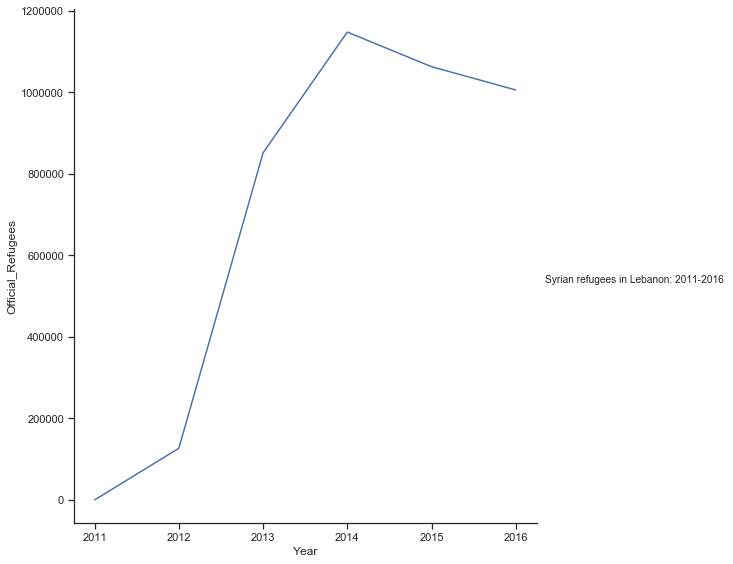

In [781]:
sns.set(style = 'ticks')
grid = sns.FacetGrid(lebanon_11to16, height=8)
grid.map(plt.plot,'Year','Official_Refugees')
grid.add_legend(ncol=2, title= 'Syrian refugees in Lebanon: 2011-2016')